In [1]:
from fractions import Fraction
from math import log
import numpy as np
import matplotlib.pyplot as plt
#from bitstring import BitArray
#from bitstring import Bits

# Probability of Symbols in Encoding $\mathbb{Q}$-Values

- Definitions
    - $R_{\vec{a}_n} := $ the set containing precisely all values represented by finite & infinite-length sequences prefixed with a given finite sequence, $\vec{a}_n$
    - $\left|S\right| := $ the **breadth** of the set, $S$
        - $S$ is *convex* $\rightarrow \left|S\right| := \mathrm{sup}(S) - \mathrm{inf}(S)$
        - else, $|S| := \sum\left|T_i\right|$, where $T_i$ makes up a partition of $S$ 

## Uniform Distribution over $\mathbb{R}$
Want to justify the assumption that for $n > 0$,  $\mathrm{Prob}\left(x_n = a_n \left|\vec{x}_{n-1} = \vec{a}_{n-1}\right.\right) = \frac{\left|R_{\vec{a}_n}\right|}{\left|R_{\vec{a}_{n-1}}\right|}$

- simple answer - treats all numbers equally -> leads to a most versatile encoding scheme

- **Uniformity** on infinitesimal subsets - $\lim_{|S|\rightarrow0^+} \mathrm{Prob}(X\in S_2 | X\in S) = \frac{|S_2|}{|S|}$ for two sets $S_2\subset S$
    - follows from assumption that the probability distribution of real values is *continuous*
    - then the *conditional probability* over a finite, convex subset of the reals *will trend to uniformity* as the breadth of the subset (denoted $\left|S\right|$) approaches 0
- $\lim_{n\rightarrow\infty}\left|R_{\vec{a}_n}\right| = 0$
    - follows from facts that
        - $\frac{\left|R_{\vec{a}_n}\right|}{\left|R_{\vec{a}_{n-1}}\right|} \leq \frac12$ for any sequence $\vec{a_n}$
        - $\left|R_{\vec{a}_n}\right|$ is finite for $n \geq 0$
    - -> as $n\rightarrow\infty$, the *probability* of a sequence being prefixed by a given finite sequence $\vec{a}_n$ will be proportional to $\left|R_{\vec{a}_n}\right|$
- $\mathrm{Prob}\left(\vec{x}_n = \vec{a}_n\right) = \mathrm{Prob}\left(X\in R_{\vec{a}_n}\right)$
- in summary: an encoding that performs well on a *uniform distribution* of numbers will perform well *as the length* of a sequence increases

## Breadth of Prefix Sequences
want to show that $\left|R_{\vec{a}_n}\right| = \left|f\left(\vec{a}_n\right) - f\left(\left[\vec{a}_{n-1}, a_n+1\right]\right)\right|$
- the set $R_{\vec{a}_n}$ **is convex**
    - follows from monotonicity of individual elements
- $\inf\left(R_{\vec{a}_n}\right) = \min\left(f\left(\vec{a}_n\right), f\left(\left[\vec{a}_{n-1}, a_n+1\right]\right)\right)$
- $\sup\left(R_{\vec{a}_n}\right) = \max\left(f\left(\vec{a}_n\right), f\left(\left[\vec{a}_{n-1}, a_n+1\right]\right)\right)$
    - one extreme - for any $b\in\mathbb{N}$, $f([a_0,a_1,...,a_{n-1}, a_n, b]) \ \{>,<\}\  f([a_0,a_1,...,a_{n-1}, a_n, \infty]) = f\left(\vec{a}_n\right)$
    - other extreme - for any $b\in\mathbb{N}$, $f([a_0,a_1,...,a_{n-1}, a_n, b]) \ \{\leq,\geq\}\  f([a_0,a_1,...,a_{n-1}, a_n, 1]) = f([a_0,a_1,...,a_{n-1}, a_n+1])$

## Conditional Probability of Symbols, given $\rho$-Value
- Definitions
    1. $f(\vec a_i) =: \frac{p_i}{q_i}$ for some relatively prime $p_i, q_i$
    1. $\rho_i := \frac{q_{i-1}}{q_i} \in (0,1)$
- Propositions
    1. $p_i = a_i(p_{i-1}) + p_{i-2}$
    1. $q_i = a_i(q_{i-1}) + q_{i-2}$
        - re-proved in paper
    1. $p_iq_{i+1} - p_{i+1}q_i = {(-1)}^i$
        - merely referenced from other sources
- Theorems
    1. $\rightarrow \left|\mathrm{R}_{\vec{a}_n}\right| = \frac1{q_n\left(q_n+q_{n-1}\right)}$
    1. $\Rightarrow \mathrm{Prob}\left(x_n = a_n \ \left| \ \vec{x}_{n-1} = \vec{a}_{n-1}\right.\right) = \frac{\rho_{n-1}+1}{\left(\rho_{n-1}+a_n\right)\left(\rho_{n-1}+a_n+1\right)}$
        - follows from reducing $\frac{\left|\mathrm{R}_{\vec{a}_n}\right|}{\left|\mathrm{R}_{\vec{a}_{n-1}}\right|}$ after directly applying Theorem 1, and Proposition 2 to the numerator
    1. $\rho_n = \frac1{a_n+\rho_{n-1}} = f\left(\left[0, a_n, a_{n-1}, ..., a_2, a_1\right]\right)$
        - first part - $\frac{q_{n-1}}{q_n}$
            $= \frac{q_{n-1}}{\left(a_n\left(q_{n-1}\right) + q_{n-2}\right)}$
            $= \frac1{a_n + \frac{q_{n-2}}{q_{n-1}}}$
            $= \frac1{a_n + \rho_{n-1}}$
        - second part follows from expansion of first, & definition of $f$

## Sanity-Check - Proof that Conditional Probability Masses sum to Unity
want to prove that $\sum_{i=1}^\infty \frac{\rho+1}{(i+\rho)(i+\rho+1)} = 1$
- rephrase: wts $\sum_{i=1}^\infty \frac1{(i+\rho)(i+\rho+1)} = \frac1{\rho+1}$
    - $\lim_{n\rightarrow\infty} \sum_{i=n}^\infty \frac1{(i+\rho)(i+\rho+1)} = 0$
        - lemma: $\left|\int_{i+\rho}^{\infty} \frac{dx}{x(x+1)}\right| < \infty$
            $\Rightarrow \left|\sum_{i=1}^\infty \frac1{(i+\rho)(i+\rho+1)}\right| < \infty$
        - because the value is finite, $\lim_{x\rightarrow\infty}$ erases the sum entirely
    - if $\sum_{i=n}^\infty \frac1{(i+\rho)(i+\rho+1)} = \frac1{\rho+n}$,
    then $\sum_{i=n-1}^\infty \frac1{(i+\rho)(i+\rho+1)} = \frac1{\rho+n-1}$
        - $\sum_{i=n}^\infty \frac1{(i+\rho)(i+\rho+1)} + \frac1{(\rho+n-1)(\rho+n)}$
        $ = \frac1{\rho+n} + \frac1{(\rho+n-1)(\rho+n)}$
        $ = \frac1{\rho+n}\left(1+\frac1{\rho+n-1}\right)$
        $ = \frac1{\rho+n}\left(\frac{\rho+n-1 + 1}{\rho+n-1}\right)$
        $ = \frac1{\rho+n-1}$
    - $\therefore$ proof by induction from $n=\infty$
- QED

# CALCULATIONS

## Continued-Fraction Probability Masses
- probability-mass: $f(x,\rho) = \frac{\rho+1}{(x+\rho)(x+\rho+1)}$
- probability-mass sums: $\sum_{i=x}^\infty f(i,\rho)$

In [2]:
#	Returns precision achieved at value 'n'
#	with value-history parameter 'rho'
def f(n, rho):
	return (rho+1.) / ((n+rho)*(n+rho+1.))

def f_rem(n,rho):
    """
    Calculates the remaining probaility for values m > n in a continued-fraction integer sequence.
    """
    return (rho+1) / (n+rho+1)

## Encodings

### Continuing-Block Encoding
This is a common encoding for infinite integer values (e.g., is used for Python 2's `long` implementation).

In [3]:
def contblock_bits(x, block=7):
    """
    Calculates the number of bits needed to encode the value x
    in continuing-block encoding, with a block size of 'block'.
    """
    x = np.asarray(x) - (x != 1)
    assert((x>=0).all())
    pos_msb = np.floor(np.log2(x))
    return ((pos_msb//block + 1) * (block+1)).astype("uint")

def contblock_xbegin(b, block=7):
    """
    Calculates the lower-bound (inclusive) of values that would be encoded
    in b bits in continuing-block encoding, with a block size of 'block'.
    """
    return (2**block) ** ((b-1)//(block+1)) + (b > block+1)

def contblock_xend(b, block=7):
    """
    Calculates the upper-bound (exclusive) of values that would be encoded
    in b bits in continuing-block encoding, with a block size of 'block'.
    """
    return (2**block) ** (b//(block+1)) + (b > block)

def contblock_xcount(b, block=7):
    """
    Calculates the number of values that would be encoded in b bits
    in continuing-block encoding, with a block size of 'block'.
    """
    return contblock_xend(b,block) - contblock_xbegin(b,block)

#print(contblock_bits(np.array([1,128,129,2**14, 2**14+1])))
#print(contblock_xbegin(np.arange(1,20)))
#print(contblock_xend(np.arange(1,20)))
#print(contblock_xcount(np.arange(1,20)))

# Consistency Tests
assert( (contblock_xbegin(contblock_bits(np.arange(1,100))) <= np.arange(1,100)).all() )
assert( (contblock_xend(contblock_bits(np.arange(1,100))) > np.arange(1,100)).all() )
assert( (contblock_xbegin(1) + np.cumsum(contblock_xcount(np.arange(1,19)))
      == contblock_xbegin(np.arange(2,20))).all() )
assert( np.sum(contblock_xcount(np.arange(1,20)) * (.5 ** np.arange(1,20))) <= 1 )

assert( (contblock_xbegin(contblock_bits(np.arange(1,100),1),1) <= np.arange(1,100)).all() )
assert( (contblock_xend(contblock_bits(np.arange(1,100),1),1) > np.arange(1,100)).all() )
assert( (contblock_xbegin(1,2) + np.cumsum(contblock_xcount(np.arange(1,19),1))
      == contblock_xbegin(np.arange(2,20),1)).all() )
assert( np.sum(contblock_xcount(np.arange(1,20),1) * (Fraction(1,2) ** np.arange(1,20))) <= 1 )

print("Continuing-block assertions passed!")

Continuing-block assertions passed!


### Lexibinary Encoding
This is an encoding proposed by Kornerup et. al., which we argue can be out-performed in terms of storage density, in exchange for a minimal increase in computation.

In [4]:
def lexi_bits(x):
    """
    Calculates the number of bits needed to encode the value x in log-binary.
    """
    x = np.asarray(x).astype("uint")
    assert((x>0).all())
    pos_msb = np.log2(x).astype("uint")
    assert(pos_msb.dtype == np.dtype("uint"))
    return 2*pos_msb + 1

def lexi_xbegin(b):
    """
    Calculates the lower-bound (inclusive) of values that would be encoded
    in b bits in log-binary.
    """
    return 2**(b//2)

def lexi_xend(b):
    """
    Calculates the upper-bound (exclusive) of values that would be encoded
    in b bits in log-binary.
    """
    return 2**((b+1)//2)

def lexi_xcount(b):
    """
    Calculates the number of values that would be encoded in b bits in log-binary.
    """
    return lexi_xend(b) - lexi_xbegin(b)

#print(lexi_bits(np.arange(1,40)))
#print(lexi_xbegin(np.arange(1,20)))
#print(lexi_xend(np.arange(1,20)))
#print(lexi_xcount(np.arange(1,20)))

# Consistency Tests
assert( (lexi_xbegin(lexi_bits(np.arange(1,100))) <= np.arange(1,100)).all() )
assert( (lexi_bits(lexi_xbegin(np.arange(1,20,2))) == np.arange(1,20,2)).all() )
assert( (lexi_bits(lexi_xend(np.arange(1,20,2))) == np.arange(1,20,2)+2).all() )
assert( (lexi_xbegin(1) + np.cumsum(lexi_xcount(np.arange(1,19)))
      == lexi_xbegin(np.arange(2,20))).all() )
assert( np.sum(lexi_xcount(np.arange(1,20)) * (Fraction(1,2) ** np.arange(1,20))) <= 1 )

print("Lexibinary assertions passed!")

Lexibinary assertions passed!


### Author's Contribution - Single-Bit-Step Lexibinary
This is, in honesty, a moderate variation on the previous lexibinary encoding.
- Rules (let $n$ be the value to encode)
    - $n = 1$ -> `0`
    - $n = 2$ -> `100`
    - incrementing $n$:
        - increment the *encoded* value, as if it were a fixed-width binary integer
        - if in doing so, *the bit to the right of the leftmost `0`-bit is flipped*, then add another `0`-bit to the right of the encoding
- Table of exemplary values

Value | Encoding || Value | Encoding
------|----------||-------|----------
1     | `0`      || 11    | `1110000`
2     | `100`    || 14    | `1110011`
3     | `1010`   || 15    | `11101000`
4     | `1011`   || 22    | `11101111`
5     | `11000`  || 23    | `111100000`
6     | `11001`  ||
7     | `110100` ||
8     | `110101` ||
9     | `110110` ||
10    | `110111` ||

In [5]:
def sbslexi_bits(x):
    """
    Calculates the number of bits needed to encode the value x in SBS-Lexibinary.
    """
    x = np.asarray(x+1).astype("uint")
    assert((x>0).all())
    pos_msb = np.log2(x).astype("uint")
    return 2*pos_msb + ((x & (2**(pos_msb-1)).astype("uint")) > 0) - (x == 2)

def sbslexi_xbegin(b):
    """
    Calculates the lower-bound (inclusive) of values that would be encoded
    in b bits in SBS-Lexibinary.
    """
    b = b + (b == 1) + (b == 2)
    return 2**(b//2 - 1) * (2 + b%2) - 1

def sbslexi_xend(b):
    """
    Calculates the upper-bound (exclusive) of values that would be encoded
    in b bits in SBS-Lexibinary.
    """
    b = b + (b == 1) + 1
    return 2**(b//2 - 1) * (2 + b%2) - 1

def sbslexi_xcount(b):
    """
    Calculates the number of values that would be encoded in b bits in SBS-Lexibinary.
    """
    return sbslexi_xend(b) - sbslexi_xbegin(b)

#print(sbslexi_bits(np.arange(1,40)))
#print(sbslexi_xbegin(np.arange(1,20)))
#print(sbslexi_xend(np.arange(1,20)))
#print(sbslexi_xcount(np.arange(1,20)))

# Consistency Tests
assert( (sbslexi_xbegin(sbslexi_bits(np.arange(1,100))) <= np.arange(1,100)).all() )
assert( sbslexi_bits(sbslexi_xbegin(1)) == 1
       and (sbslexi_bits(sbslexi_xbegin(np.arange(3,20))) == np.arange(3,20)).all() )
assert( sbslexi_bits(sbslexi_xend(1)) == 3
       and (sbslexi_bits(sbslexi_xend(np.arange(3,20))) == np.arange(3,20)+1).all() )
assert( (sbslexi_xbegin(1) + np.cumsum(sbslexi_xcount(np.arange(1,19)))
      == sbslexi_xbegin(np.arange(2,20))).all() )
assert( np.sum(sbslexi_xcount(np.arange(1,20)) * (Fraction(1,2) ** np.arange(1,20))) <= 1 )
print("SBS-lexibinary assertions passed!")

SBS-lexibinary assertions passed!


### Author's Contribution - SBS-Encoding (Variant 2)
This is another modest variant on lexibinary, which is more effective for near-unity $\rho$-values.

The rules for the encoding are the same as in SBS1, with different initial symbol encodings:
- $n = 1$ -> `00`
- $n = 2$ -> `01`
- $n = 3$ -> `100`

See the table of exemplified values below:

Value | Encoding || Value | Encoding
------|----------||-------|----------
1     | `00`     || 11    | `110111`
2     | `01`     || 12    | `1110000`
3     | `100`    || 15    | `1110011`
4     | `1010`   || 16    | `11101000`
5     | `1011`   || 23    | `11101111`
6     | `11000`  || 24    | `111100000`
7     | `11001`  ||
8     | `110100` ||
9     | `110101` ||
10    | `110110` ||

In [6]:
def sbs2lexi_bits(x):
    """
    Calculates the number of bits needed to encode the value x in SBS2-Lexibinary.
    """
    x = np.asarray(x + (x == 1)).astype("uint")
    assert((x>0).all())
    pos_msb = np.log2(x).astype("uint")
    return 2*pos_msb + ((x & (2**(pos_msb-1)).astype("uint")) > 0)

def sbs2lexi_xbegin(b):
    """
    Calculates the lower-bound (inclusive) of values that would be encoded
    in b bits in SBS2-Lexibinary.
    """
    b = b + (b == 1)
    return 2**(b//2 - 1) * (2 + b%2) - (b <= 2)

def sbs2lexi_xend(b):
    """
    Calculates the upper-bound (exclusive) of values that would be encoded
    in b bits in SBS2-Lexibinary.
    """
    b = b + 1
    return 2**(b//2 - 1) * (2 + b%2) - (b == 2)

def sbs2lexi_xcount(b):
    """
    Calculates the number of values that would be encoded in b bits in SBS2-Lexibinary.
    """
    return sbs2lexi_xend(b) - sbs2lexi_xbegin(b)

#print("bits:", sbs2lexi_bits(np.arange(1,40)))
#print("begin:", sbs2lexi_xbegin(np.arange(1,20)))
#print("end:", sbs2lexi_xend(np.arange(1,20)))
#print("xcount:",sbs2lexi_xcount(np.arange(1,20)))

# Consistency Tests
assert( (sbs2lexi_xbegin(sbs2lexi_bits(np.arange(1,100))) <= np.arange(1,100)).all() )
assert( (sbs2lexi_bits(sbs2lexi_xbegin(np.arange(2,20))) == np.arange(2,20)).all() )
assert( (sbs2lexi_bits(sbs2lexi_xend(np.arange(2,20))) == np.arange(2,20)+1).all() )
assert( (sbs2lexi_xbegin(1) + np.cumsum(sbs2lexi_xcount(np.arange(1,19)))
      == sbs2lexi_xbegin(np.arange(2,20))).all() )
assert( np.sum(sbs2lexi_xcount(np.arange(1,20)) * (Fraction(1,2) ** np.arange(1,20))) <= 1 )
print("sbs2-lexibinary assertions passed!")

sbs2-lexibinary assertions passed!


### Huffman Optimal-Encoding Estimator
This code generates an estimate of the optimal encoding for a given $\rho$-value.

Note - the Huffman algorithm can**not** be used to generate an *exact* optimal encoding, since
1. there are an infinite number of symbols to encode, and
1. there are only a finite number (none, for some $\rho$-values) of $n$ such that $f(n,\rho) \geq \sum_{i=n+2}^\infty f(i,\rho)$
    - this condition *would otherwise* allow one to assume that the Huffman coding would lump the remaining $[n+2,\infty$] values into a single binary branch of the encoding
    - thus, the collective probability for these elements could be treated as that of a *single symbol*, without altering the algorithm's results
    - since this is not the case, this cannot be done w/o changing the algorithm's results

In [7]:
import heapq

def tuple_iter(iterables):
    iters = tuple(i.__iter__() for i in iterables)
    while True:
        try:
            yield tuple(i.__next__() for i in iters)
        except StopIteration:
            break
    
def bits_huff(probs, symbols=None):
    if symbols == None:
        symbols = range(len(probs))
    # Create priority queue
    h = []
    iter_prob = probs.__iter__()
    iter_symb = symbols.__iter__()
    while True:
        try:
            heapq.heappush(h, [iter_prob.__next__(), [[iter_symb.__next__(),0]]])
        except StopIteration:
            break
    # Collapse queue into binary tree
    while len(h) > 1:
        item1 = heapq.heappop(h)
        item2 = heapq.heappop(h)
        item = [item1[0]+item2[0], item1[1]+item2[1]]
        for i in range(len(item[1])):
            item[1][i][1] += 1
        heapq.heappush(h, item)
    symb_and_bits = heapq.heappop(h)[1]
    # Write bits (int) into dict by symbol (int)
    return dict(symb_and_bits)
    # Write symbols into nested lists by bits
    #bits_max = max(i[1] for i in symb_and_bits)
    #return [[j[0] for j in symb_and_bits if j[1] == i] for i in range(bits_max)]



### Constants / Organizing Constructs

In [8]:
# CONSTANTS
xmax = 2**12
BAR = 10**(-0.25)

x = np.arange(1,xmax+1)[:,np.newaxis]
rhos = np.linspace(0,1,40)
probs = f(x, rhos)

class ValBits:
    def __init__(self, bits, xbegin=None, xend=None, xcount=None):
        self.bits = bits
        self.xbegin = xbegin
        self.xend = xend
        self.xcount = xcount if xcount != None \
            else lambda b: xend(b) - xbegin(b)

valbits = (
    # precision factor of continuing-block encoding (w/ block size of 1 bit)
    ValBits(
        bits = lambda x: contblock_bits(x,1),
        xbegin = lambda x: contblock_xbegin(x,1),
        xend = lambda x: contblock_xend(x,1),
        xcount = lambda x: contblock_xcount(x,1),
    ),
    # precision factor of continuing block encoding (w/ block size of 7 bit)
    ValBits(
        bits = lambda x: contblock_bits(x,7),
        xbegin = lambda x: contblock_xbegin(x,7),
        xend = lambda x: contblock_xend(x,7),
        xcount = lambda x: contblock_xcount(x,7),
    ),
    # lexibinary
    ValBits(
        bits = lexi_bits,
        xbegin = lexi_xbegin,
        xend = lexi_xend,
        xcount = lexi_xcount,
    ),
    # precision factor of log-binary encoding
    ValBits(
        bits = sbslexi_bits,
        xbegin = sbslexi_xbegin,
        xend = sbslexi_xend,
        xcount = sbslexi_xcount,
    ),
    # precision factor of sbs2-lexibinary encoding
    ValBits(
        bits = sbs2lexi_bits,
        xbegin = sbs2lexi_xbegin,
        xend = sbs2lexi_xend,
        xcount = sbs2lexi_xcount,
    ),
)
labels = (
    "VLQ - block size = 1 bit",
    "VLQ - block size = 7 bits",
    "Lexibinary",
    "SBS-LexiBinary",
    "SBS2-LexiBinary",
    "Huffman encoding (approx.)",
    "theoretical limit",
)
ltypes = ('0.33','0.67', 'g','r','m',
         'b', 'y')

index_enc = {
    "VLQ1": 0,
    "VLQ7": 1,
    "Lexi": 2,
    "SBS1": 3,
    "SBS2": 4
}

bits_opt = [ bits_huff(probs[:,i], range(1,xmax+1)) for i in range(len(rhos)) ]
bits_opt = np.array([
    [ bits_opt[i][j] for i in range(len(rhos)) ] for j in range(1,xmax+1)
])

#print(list(bits_opt[:,29]))


### Graph: Encoding lengths (bits) vs. values encoded
The following graph compares the length of encodings using the various encoding schemes described above.

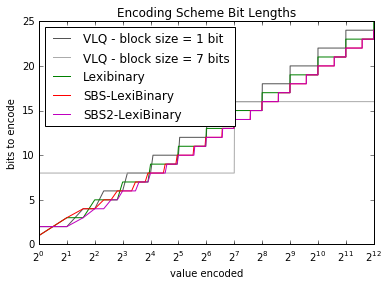

In [9]:
def plot_encsize_vs_value():
    
    for j, vb in enumerate(valbits):
        bits = np.arange(1,vb.bits(xmax)+1)[
            vb.xcount(np.arange(1,vb.bits(xmax)+1)) > 0
        ]
        x = np.minimum(
            xmax,
            np.array([vb.xbegin(bits),vb.xend(bits)-1]).flatten(order='F')
        )
        bits = np.array(2*[bits]).flatten(order='F')

        plt.plot(x,bits, ltypes[j], label=labels[j])

    plt.title("Encoding Scheme Bit Lengths")
    plt.legend(loc="upper left")
    plt.xscale("log", basex=2)
    plt.xlabel("value encoded")
    plt.ylabel("bits to encode")
    plt.show()
    
    return
    
plot_encsize_vs_value()

# FUNCTIONS

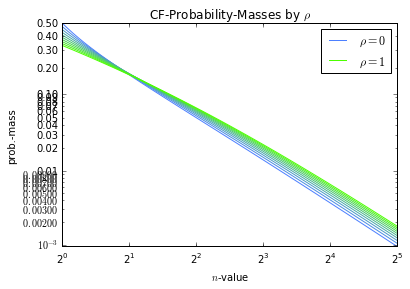

In [10]:
# Plots the precision increase achieved (y coord.) by adding a term a_n (x coord.)
# for rho-values between 0 and 1
def plot_probmass_vs_value():
    # Init Figure
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    labels = (
        "$\\rho=0$",
        "$\\rho=1$",
        "lower-bound",
        "upper-bound"
    )

    # Constants
    NO_OF_BITS = 5
    SAMPLES_PERBIT = 10
    #samples=1+SAMPLES_PERBIT*(NO_OF_BITS-1)
    rho_samples=10
    #x_bits = np.arange(0, NO_OF_BITS, 1./SAMPLES_PERBIT)
        # bits used to represent x
        #[1+float(i)/SAMPLES_PERBIT for i in range(samples)]
    x = 2 ** np.linspace(0, NO_OF_BITS, 1 + (NO_OF_BITS+1) * SAMPLES_PERBIT)
    rhos = np.linspace(0, 1, rho_samples)
        #[float(i)/rho_samples for i in range(rho_samples+1)]
    f_precision_CT_temp = lambda a: f(x,a)#**(1./x_bits)
    
    # Plot Alpha Curves
    plt.plot(
        x, #x_bits,
        f_precision_CT_temp(0),
        color=(0.3,0.5,1),
        label=labels[0]
    )
    for a in rhos[1:-1]:
        plt.plot( #x_bits,
            x, f_precision_CT_temp(a), color=(0.3,0.5*(a+1),1-a))
    plt.plot(
        x, #x_bits,
        f_precision_CT_temp(1),
        color=(0.3,1,0),
        label=labels[1]
    )

    # Constants
    x = 2**np.arange(NO_OF_BITS+1)
    
    '''
    # Lower-bound for probability-mass of Continued Fraction values
    prec_CF_low = f_best(x)#**(1./x_bits)
    # Upper-bound for probability-mass of Continued Fraction values
    prec_CF_high = f_worst(x)#**(1./x_bits)

    # Plot
    plt.plot(x, prec_CF_low,  'm^', label=labels[2])
    plt.plot(x, prec_CF_high, 'mv', label=labels[3])
    '''
    
    plt.title("CF-Probability-Masses by $\\rho$")
    plt.xlabel("$n$-value")
    plt.ylabel("prob.-mass")
    plt.legend()
    plt.xscale("log", basex=2)
    plt.yscale("logit")
    plt.show()
# End function

plot_probmass_vs_value()

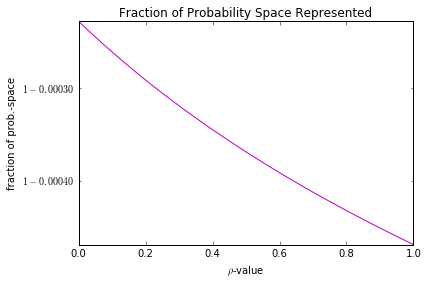

In [11]:
def plot_probspacerep_vs_rho():
    #x = np.arange(1,xmax+1)[:,np.newaxis]
    rhos = np.linspace(0,1,40)
    #probs = np.sum(f(x, rhos), axis=0)

    probs = 1-f_rem(xmax+1, rhos)

    plt.plot(rhos, probs, "m-")
    plt.title("Fraction of Probability Space Represented")
    plt.xlabel("$\\rho$-value")
    plt.ylabel("fraction of prob.-space")
    plt.yscale("logit")
    #plt.ylim((.0001,.9999))
    #plt.yticks([10e-4, 10e-3, 10e-2, 10e-1, 0.5, 1-10e-1, 1-10e-2, 1-10e-3, 1-10e-4])
    plt.show()
    
plot_probspacerep_vs_rho()

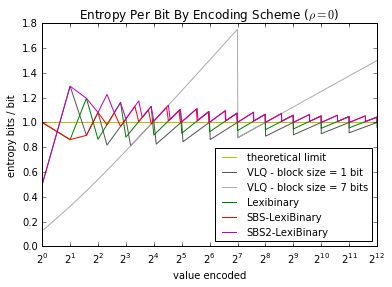

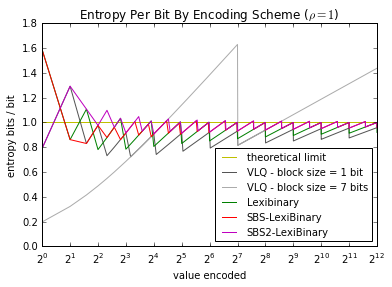

In [12]:
def plot_entropyperbit_vs_value():
    # Constants
    #xmax = 2 ** 16
    rhos = (0,1)
    
    #fig, axs = plt.subplots(nrows=len(rhos), ncols=1, sharex=True)
    for i, rho in enumerate(rhos):
        plt.figure()
        plt.plot((0, xmax), (1,1),  ltypes[-1],
                 label=labels[-1])
        for j, vb in enumerate(valbits):
            x = np.arange(1,xmax+1)
            bits = vb.bits(x)
            #'''
            y = -np.log2(f(x, rho)) / bits

            plt.plot(x,y, ltypes[j], label=labels[j])

        plt.title("Entropy Per Bit By Encoding Scheme ($\\rho="+str(rho)+"$)")
        plt.legend(loc="lower right", prop={"size": 10})
        plt.xscale("log", basex=2)
        #plt.yscale("logit")
        plt.xlabel("value encoded")
        plt.ylabel("entropy bits / bit")
        plt.show()
# End function

plot_entropyperbit_vs_value()

## Entropy Bits per Bit

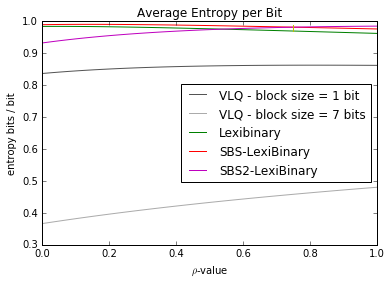

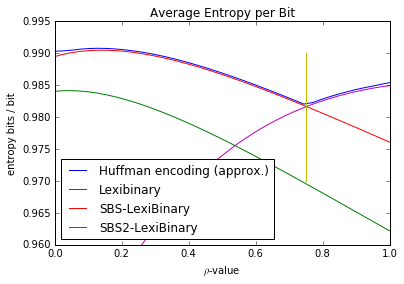

In [38]:
def plot_avgentropyperbit_vs_rho():
    # Constants
    x = np.arange(1,xmax+1)[:,np.newaxis]
    rhos = np.linspace(0,1,40)
    probs = f(x, rhos)
    
    for k, iter in enumerate((range(len(valbits)), range(2,len(valbits)))):
        plt.figure()
        if k == 1:
            # Plot theoretical floating-point limit
            # plt.plot((0,1), (1,1), ltypes[-1], label=labels[-1])
            # Plot practical, Huffman limit
            plt.plot(
                rhos,
                np.sum(probs * -np.log2(probs), axis=0) / np.sum(probs * bits_opt, axis=0), 
                ltypes[-2],
                label=labels[-2]
            )
        # Plot other schemes
        for i in iter:
            bits_x = valbits[i].bits(x)
            plt.plot(
                rhos,
                np.sum(probs * -np.log2(probs), axis=0) / np.sum(probs * bits_x, axis=0), 
                ltypes[i],
                label=labels[i]
            )
        
        plt.plot((0.75,0.75), (0.97,0.99), 'y-')
        
        plt.title("Average Entropy per Bit")
        plt.legend(loc="best")
        plt.xlabel("$\\rho$-value")
        plt.ylabel("entropy bits / bit")
        if k == 1:
            plt.ylim((0.96, 0.995))
        #plt.yscale("logit")
        plt.show()
    
    return

plot_avgentropyperbit_vs_rho()

## Estimating Probability Distribution of $\rho$

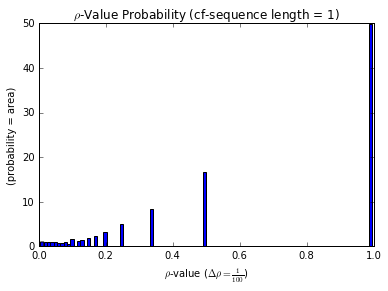

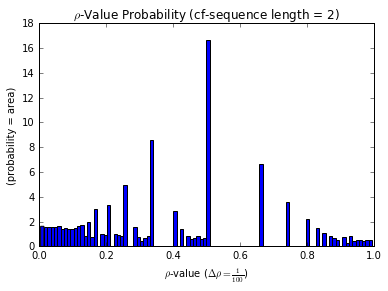

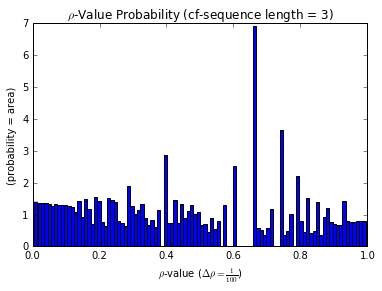

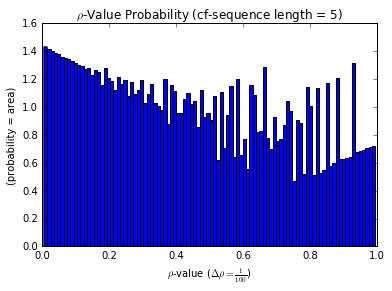

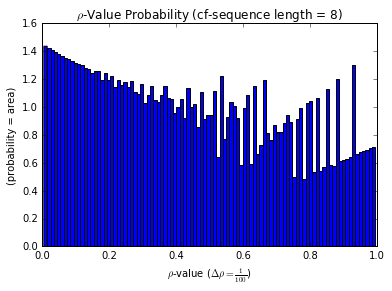

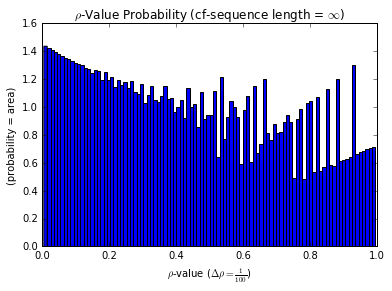

In [31]:
class RhoMat:
    def __init__(self, no_of_samples):
        self.no_of_samples = no_of_samples
        self.value = rho_mat(no_of_samples)
        
        self.eigvecs = None
        self.eigvals = None
    def __pow__(self, exp):
        if self.eigvec is None:
            self.eigvals, self.eigvecs = np.linalg.eig(A)
        return np.asmat(self.eigvecs).T * np.asmat(self.eigvecs * (self.eigvals ** exp))

def rho_mat(no_of_samples):
    max_a = no_of_samples-1 #if a_n > no. of samples, then rho_n+1 = 1/(rho_n+a_n) MUST be in the 0-th bin
    
    a_nplus1 = np.arange(1,max_a+1)[:,np.newaxis]
    rhos = np.linspace(0,1,2*no_of_samples+1)[1:-1:2]
    
    rhos_next = 1 / (rhos + a_nplus1)
    rhoprobs_next = (rhos+1) / ((rhos+a_nplus1) * (rhos+a_nplus1+1))
    
    # Generate matrix from a-values
    A = np.mat(np.zeros((no_of_samples,no_of_samples)))
    for i in range(no_of_samples):
        rho_hist, bin_edges = np.histogram(
            rhos_next[:,i],
            weights = rhoprobs_next[:,i],
            bins = no_of_samples,
            range = (0,1)
        )
        A[:,i] = rho_hist[:,np.newaxis]
    assert (A[0] == 0).all() # always true since a_n < samples
    A[0] = 1 - A.sum(axis=0)
    assert np.isclose(1, A.sum(axis=0)).all()
    
    return A

def prob_rho_iter(no_of_samples, n_init=0):
    def process_step(val):
        if int(val) != val:
            raise ValueError("series length must be an integer")
        return int(val) if val is not None else 1
    
    probs = np.mat([1] + [0]*(no_of_samples-1))
    n_step = process_step(n_init)
    A_T = rho_mat(no_of_samples).T
    
    while True:
        if n_step:
            probs = probs * (A_T if n_step == 1 else A_T ** n_step)
        n_step = process_step((yield np.asarray(probs[:])[0]))
    
def prob_rho_inf(no_of_samples, ret_eval=False):
    A = rho_mat(no_of_samples)
    evals, evects = np.linalg.eig(A)
    #print(evals)
    index_e1 = (np.absolute(evals-1) == np.min(np.absolute(evals-1)))
    v_e1_comp = np.asarray(evects[:, index_e1]).flatten() / evects[:, index_e1].sum()
    v_e1 = np.real(v_e1_comp)
    assert (v_e1 == v_e1_comp).all()
    return v_e1 if not ret_eval else (v_e1, evals[index_e1])
    
def plot_projrho(n_to_plot, no_of_samples=100):
    rhos = np.linspace(0,1, 2*no_of_samples + 1)[1:-1:2]
    prob_iter = prob_rho_iter(no_of_samples, n_to_plot[0])
    deltas = [None]+[i2-i1 for i1, i2 in zip(n_to_plot[:-1], n_to_plot[1:])]
    
    for probs, n in zip((prob_iter.send(delta) for delta in deltas), n_to_plot):
        probs = probs * no_of_samples
        
        plt.hist(rhos, weights=probs, bins=no_of_samples)
        plt.title("$\\rho$-Value Probability (cf-sequence length = " + str(n) + ")")
        plt.xlabel("$\\rho$-value ($\\Delta\\rho = \\frac{1}{" + str(no_of_samples) + "}$)")
        plt.ylabel("(probability = area)")
        plt.show()    
        
def plot_projrho_inf(no_of_samples=100):
    rhos = np.linspace(0,1, 2*no_of_samples + 1)[1:-1:2]
    probs = prob_rho_inf(no_of_samples) * no_of_samples

    plt.hist(rhos, weights=probs, bins=no_of_samples)
    plt.title("$\\rho$-Value Probability (cf-sequence length = $\\infty$)")
    plt.xlabel("$\\rho$-value ($\\Delta\\rho = \\frac{1}{" + str(no_of_samples) + "}$)")
    plt.ylabel("(probability = area)")
    plt.show()    

plot_projrho((1,2,3,5,8), no_of_samples=100)
plot_projrho_inf(no_of_samples=100)


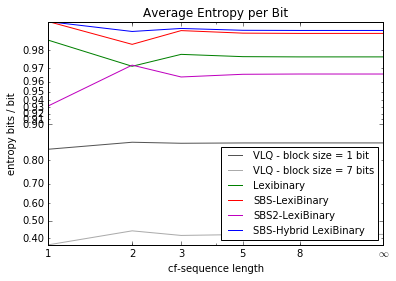

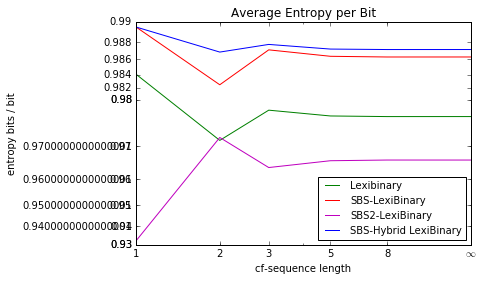

In [32]:
def plot_avgentropyperbit_vs_seqlen():
    # Constants
    rho_samples = 300
    x = np.arange(1,xmax+1)[:,np.newaxis]
    rhos = np.linspace(0,1,2*rho_samples+1)[1:-1:2]
    probs = f(x, rhos)
    seqlen = (1,2,3,5,8,16)
    # Generate approximate rho probabilities
    A_T = rho_mat(rho_samples).T
    i = 1
    probs_rho = np.asarray([[1] + [0]*(rho_samples-1)])
    for n in seqlen[1:-1]:
        probs_rho = np.concatenate((
            probs_rho,
            np.asarray(probs_rho[-1] * (A_T ** (n-i)))
        ), axis=0)
        i = n
    probs_rho = np.concatenate((
        probs_rho,
        prob_rho_inf(rho_samples)[np.newaxis]
    ), axis=0)
    #probs_rho /= probs_rho.sum(axis=-1)[:,np.newaxis]
    
    # Plot results
    for k, vb_set in enumerate((valbits, valbits[2:])):
        plt.figure()
        for i, vb in enumerate(vb_set, len(valbits) - len(vb_set)):
            bits_x = vb.bits(x)
            entropy_by_rho = np.sum(probs * -np.log2(probs), axis=0) / np.sum(probs * bits_x, axis=0)
            entropy_by_seqlen = np.sum(probs_rho * entropy_by_rho, axis=-1)
            plt.plot(seqlen, entropy_by_seqlen, ltypes[i], label=labels[i])
        # Plot results for hybrid encoding
        bits_x = valbits[index_enc["SBS1"]].bits(x)
        entropy_by_rho_sbs1 = np.sum(probs * -np.log2(probs), axis=0) / np.sum(probs * bits_x, axis=0)
        bits_x = valbits[index_enc["SBS2"]].bits(x)
        entropy_by_rho_sbs2 = np.sum(probs * -np.log2(probs), axis=0) / np.sum(probs * bits_x, axis=0)

        entropy_by_seqlen = np.sum(probs_rho * np.concatenate((
            entropy_by_rho_sbs1[:rho_samples*3 // 4],
            entropy_by_rho_sbs2[ rho_samples*3 // 4:]
        )), axis=-1)
        plt.plot(seqlen, entropy_by_seqlen, "b", label="SBS-Hybrid LexiBinary")

        # Configure plot
        plt.title("Average Entropy per Bit")
        plt.legend(loc="lower right", prop={"size": 10})
        plt.xlabel("cf-sequence length")
        plt.ylabel("entropy bits / bit")
        plt.xscale("log", basex=2)
        plt.yscale("logit")
        plt.xticks(seqlen, [str(n) for n in seqlen[:-1]] + ["$\\infty$"])
        #if k == 0:
        #    plt.ylim((.35,.99))
        #    yticks = np.concatenate((np.arange(.4,.9,.1), np.arange(.9,1.0,.02)))
        #    plt.yticks(yticks, [str(x) for x in yticks])
        if k == 1:
            plt.ylim((.93,.99))
            #yticks = (.93,.94,.95,.96,.97,.98,  .982,.984,.986,.988,.99)
            yticks = np.concatenate((np.arange(.93,.98,.01), np.linspace(.98,.99,6)))
            plt.yticks(yticks, [str(x) for x in yticks])
        plt.show()

plot_avgentropyperbit_vs_seqlen()

# Possible Future Work
- [X] use Huffman encodings to (approximately) determine the **maximum entropy-per-bit achievable** for particular $\rho$-values
    - would demonstrate the effectiveness of SBS-Lexibinary, relative to a maximum-possible performance
    - would not rely on results relative to a competitor's encoding
- [X] create an encoding that is more effective for near-unity $\rho$-values
    - could combine with SBS to make a more effective, **hybrid encoding**
        - track $\rho$-values through encoding process
        - choose best encoding scheme for the given $\rho$
        - [X] determine exact $\rho$ at which to switch between SBS1 and SBS2
        - [ ] prove the value is correct
- [X] determine probability of $\rho$-values themselves
    - -> can then calculate absolute probabilistic characteristics of encoding schemes
    - if near-unity $\rho$-values have a non-negligible probability, then a hybrid encoding with SBS2-lexibinary could be justified